#### additional lipidomic plots

In [ ]:
library(ggplot2)
library(ggsignif)

In [300]:
# load PM lipidomic data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$pm_all
cts = assays(d)$counts
class = rowData(d)$lipid.class
cts$class = class

# sum lipidomic data by class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
genotype = colData(d)$LOF_status
df = as.data.frame(cbind(df, genotype, total))

In [303]:
head(df)

,AcCa,AcHexChE,AEA,CarE,Cer,CerG3GNAc1,ChE,CL,Co,cPA,⋯,SPH,SPHP,SQDG,ST,StE,TG,WE,ZyE,genotype,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1A,6.2300e+10,3e+08,9.10e+09,7.0e+07,386842200000,8.56e+09,4.0020e+11,3.52151e+11,1.2e+10,2e+08,⋯,8.100e+09,0e+00,4.401e+09,1.0e+08,5e+08,87894000000,5.650e+10,4.4900e+10,CON,1.250676e+13
5C,3.1270e+10,4e+07,6.07e+09,1.0e+08,228500000000,7.30e+09,4.1020e+11,5.36492e+11,5.7e+10,2e+08,⋯,5.080e+09,7e+06,8.740e+08,2.4e+08,2e+08,682171000000,1.200e+08,1.3900e+10,CON,1.211328e+13
7D,3.6670e+10,5e+07,9.90e+09,1.0e+08,302010000000,6.30e+09,4.2890e+11,5.38716e+11,6.9e+10,2e+08,⋯,8.300e+09,0e+00,1.730e+09,6.0e+08,1e+08,411700600000,1.615e+10,1.2820e+10,CON,1.222214e+13
9E,5.5391e+10,1e+08,7.70e+09,3.6e+08,468780000000,6.69e+09,5.0900e+11,5.44110e+11,6.8e+10,5e+08,⋯,6.720e+09,9e+07,2.170e+09,4.0e+08,2e+08,314180000000,1.540e+10,1.2110e+10,CON,1.285725e+13
13G,4.6470e+10,8e+07,6.41e+09,2.5e+08,372950000000,4.40e+09,5.0240e+11,5.61390e+11,7.6e+10,1e+08,⋯,5.150e+09,0e+00,1.267e+09,2.0e+08,5e+08,519490000000,8.000e+08,1.1200e+10,CON,1.309803e+13
19J,7.4652e+10,1e+08,8.53e+09,6.0e+08,381990000000,4.30e+09,5.0834e+11,4.73250e+11,5.2e+10,8e+08,⋯,6.476e+09,2e+06,2.070e+09,2.0e+08,2e+08,328610000000,1.608e+10,1.6104e+10,CON,1.212852e+13


In [313]:
# plot total TAG abundance by genotype

options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/tg_abundance_PM.pdf', width = 3, height = 3)

ggplot(df, aes(x = genotype, y = TG)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) 

dev.off()

png 
  2

In [314]:
# plot the TAG to PC ratio by genotype

options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/tg_pc_ratio_pm.pdf', width = 3, height = 3)

ggplot(df, aes(x = genotype, y = PC/TG)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "PC:TAG ratio", title = "PC:TAG") +
  theme_minimal() +   geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) 

dev.off()

png 
  2

In [189]:
# load the iN lipidomics data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$ngn2_all
cts = assays(d)$counts
class = rowData(d)$lipid.class
cts$class = class

# sum by lipid class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df = as.data.frame(cbind(df, colData(d)[,c('Genotype', 'treatment', 'Cell counts')], total))

df2 = df[df$treatment!='Choline',]
df2$Genotype = factor(df2$Genotype, levels = c('Control', 'ABCA7 LoF'))

In [178]:
head(df)

,Cer,ChE,CL,Co,DG,DGDG,DLCL,FA,Hex1Cer,Hex2Cer,⋯,PMe,PS,SM,SPH,SQDG,ST,StE,TG,WE,ZyE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s1.1,3702638933,591029131,1768772991,0,943418112,16752314,0.0,0,465514498,0,⋯,68521847,2257890047,105442502,37252496,30122884,0,46419304,16655283239,23085734,70486177
s1.2,5407041856,1146440499,3618691385,0,1816871876,20411920,0.0,0,907496987,3641978,⋯,111839334,4179755007,331133586,54559431,35363193,0,112450485,34530945724,5159899,263034345
s1.3,5533459217,1076172373,979251047,0,1539347547,14489368,956677.3,0,481353783,2756334,⋯,112198406,4108844756,393493211,397284933,22465223,0,78252001,28848806557,88454166,159853362
s2.1,6121670048,1697736106,6891035239,0,3131755006,19088219,0.0,0,1369048889,12670596,⋯,125946553,2798922053,362526642,119982125,30670514,0,340725199,99772307353,41171296,530828893
s2.2,5973510801,1598589490,7280455831,0,3898772470,22605288,0.0,2494466,1665561236,13809475,⋯,113659604,2758784040,450941100,152351972,36620029,0,454292265,104964544732,82532401,850765398
s2.3,7921621319,2047895987,4278658267,107376815,4348523042,17314463,0.0,0,1738699455,19088814,⋯,153484887,4873474286,771882467,243846349,27567211,0,558088995,118920411253,127907335,873008505


In [287]:
# plot TAG abundance normalized to N cells
options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/tg_abundance.pdf', width = 3, height = 3)

ggplot(df2, aes(x = Genotype, y = TG/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("ABCA7 LoF", "Control")), textsize = 5, test = "t.test", map_signif_level = F) 

dev.off()

png 
  2

In [288]:
# plot the PC to TAG ratio
options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/pc_tg_ratio.pdf', width = 3, height = 3)

ggplot(df2, aes(x = Genotype, y = (PC)/(TG))) +
  geom_boxplot() +
  labs(x = "Genotype", y = "PC:TAG ratio", title = "PC:TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("ABCA7 LoF", "Control")), textsize = 5, test = "t.test", map_signif_level = F) 
dev.off()

png 
  2

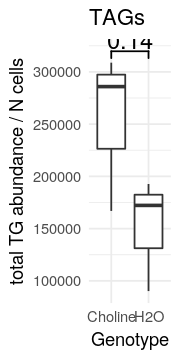

In [279]:
# Plot TAG abundance by cell count for choline vs vehicle treatment

df2 = df[df$treatment!='N/A',]
df2 = df2[df2$Genotype!='Control',]
df2$Genotype = factor(df2$Genotype, levels = c('Control', 'ABCA7 LoF'))

options(repr.plot.width = 1.5, repr.plot.height = 3)

ggplot(df2, aes(x = treatment, y = TG/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("Choline", "H2O")), textsize = 5, test = "t.test", map_signif_level = F) 


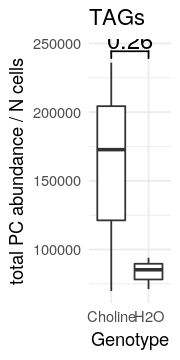

In [281]:
# Plot PC abundance by cell count for choline vs vehicle treatment

options(repr.plot.width = 1.5, repr.plot.height = 3)

ggplot(df2, aes(x = treatment, y = PC/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total PC abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("Choline", "H2O")), textsize = 5, test = "t.test", map_signif_level = F) 


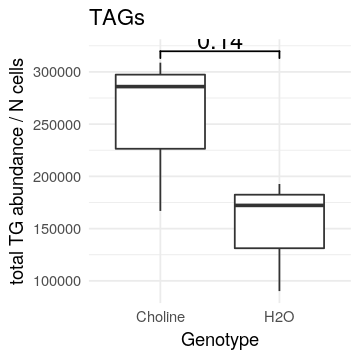

In [257]:
# Create a boxplot
options(repr.plot.width = 3, repr.plot.height = 3)

ggplot(df2, aes(x = treatment, y = TG/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("Choline", "H2O")), textsize = 5, test = "t.test", map_signif_level = F) 
